<a href="https://colab.research.google.com/github/jaearao/157-Project/blob/main/Final-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group name: ARGz

Members: Arao, Arzaga, Garcia

General topic: Data processing with Netflix TV and movie data

- predict the genre from other characteristics

- use DataCamp Netflix data and perform ML classification to predict the genre

- test datasets

- We will use a confusion matrix to show the accuracy of the model in predicting genre; we can use this to suggest movies or genres that are applicable


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from transformers import AutoTokenizer, AutoModel

from sklearn import model_selection, decomposition, preprocessing
from sklearn import linear_model, tree, ensemble

In [ ]:
netflix_data = pd.read_csv("datalab_export_2025-04-10-16_28_24.csv")
netflix_data

,index,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...,...
4807,4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


In [ ]:
netflix_data_clean = netflix_data.drop(["index", "show_id", "director", "cast", "date_added", "description"], axis = 1)
netflix_data_clean

,type,title,country,release_year,duration,genre
0,Movie,7:19,Mexico,2016,93,Dramas
1,Movie,23:59,Singapore,2011,78,Horror Movies
2,Movie,9,United States,2009,80,Action
3,Movie,21,United States,2008,123,Dramas
4,TV Show,46,Turkey,2016,1,International TV
...,...,...,...,...,...,...
4807,Movie,Zombieland,United States,2009,88,Comedies
4808,Movie,Zoo,India,2018,94,Dramas
4809,Movie,Zoom,United States,2006,88,Children
4810,Movie,Zozo,Sweden,2005,99,Dramas


In [ ]:
np.unique(netflix_data_clean["country"].values)

array(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belgium',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'China',
       'Colombia', 'Croatia', 'Czech Republic', 'Denmark', 'Egypt',
       'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Guatemala',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kenya',
       'Kuwait', 'Lebanon', 'Malaysia', 'Mexico', 'Namibia',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovenia',
       'Somalia', 'South Africa', 'South Korea', 'Soviet Union', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey',
       'United Arab', 'United Kingdom', 'United States', 'Uruguay',
       'Venezuela', 'Vietnam', 'Zimbabwe'], dtype=object)

<BarContainer object of 72 artists>

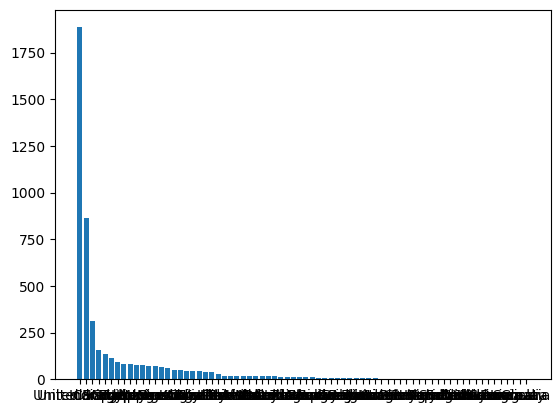

In [ ]:
country_counts = netflix_data_clean["country"].value_counts()

plt.bar(country_counts.index, country_counts.values)

In [ ]:
feature_cols = netflix_data_clean.columns[netflix_data_clean.columns != "genre"]
target_col = "genre"

features = netflix_data_clean.loc[:, feature_cols]
target = netflix_data_clean.loc[:, target_col]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, train_size = 0.8, random_state = 0)

In [ ]:
np.unique(netflix_data_clean["genre"].values)

array(['Action', 'Anime Features', 'Anime Series', 'British TV',
       'Children', 'Classic', 'Classic Movies', 'Comedies', 'Crime TV',
       'Cult Movies', 'Documentaries', 'Docuseries', 'Dramas',
       'Horror Movies', 'Independent Movies', 'International Movies',
       'International TV', 'Kids', 'LGBTQ Movies', 'Music', 'Reality TV',
       'Romantic Movies', 'Romantic TV', 'Sci-Fi', 'Stand-Up',
       'TV Action', 'TV Comedies', 'TV Horror', 'TV Shows', 'Thrillers',
       'Uncategorized'], dtype=object)

1. One-Hot-Encode the countries
2. Embed the title data

# Task
can you tokenize and embed the title column

Here is all the data you need:
"datalab_export_2025-04-10-16_28_24.csv"

## Data loading

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the provided CSV file into a pandas DataFrame and display the first few rows and the shape of the DataFrame.



In [ ]:
df = netflix_data_clean

## Data preparation

### Subtask:
Prepare the 'title' column for tokenization and embedding.


**Reasoning**:
Extract the 'title' column, handle missing values by replacing them with empty strings, and then print the first 5 values and the shape of the resulting series.



In [ ]:
titles = df['title'].fillna("")
print(titles.head())
print(titles.shape)

0     7:19
1    23:59
2        9
3       21
4       46
Name: title, dtype: object
(4812,)


## Data wrangling

### Subtask:
Tokenize the titles in the `titles` Series.


**Reasoning**:
Tokenize the titles using spaCy and print the first 5 tokenized titles.



In [ ]:
import spacy

try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading the 'en_core_web_sm' model...")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

tokenized_titles = []
for title in titles:
    doc = nlp(str(title))
    tokens = [token.text for token in doc]
    tokenized_titles.append(tokens)

for i in range(5):
    print(tokenized_titles[i])

['7:19']
['23:59']
['9']
['21']
['46']


## Feature engineering

### Subtask:
Generate embeddings for the tokenized titles.


**Reasoning**:
Generate embeddings for the tokenized titles using Sentence Transformers.



In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

try:
    model = SentenceTransformer('all-mpnet-base-v2')
except Exception as e:
    print(f"Error loading Sentence Transformer model: {e}")
    exit()

title_embeddings = []
for title in titles:
    embedding = model.encode(title)
    title_embeddings.append(embedding)

title_embeddings = np.array(title_embeddings)
print(title_embeddings.shape)

(4812, 768)


In [ ]:
title_embeddings[0]

array([-4.90760803e-02, -7.84290284e-02,  3.39570977e-02, -4.85086702e-02,
       -7.46017247e-02, -1.79708528e-03, -1.56047137e-03, -4.64617275e-04,
        8.28669034e-03,  4.20113616e-02,  2.30482239e-02,  1.04647363e-02,
        1.13385851e-02,  2.83665992e-02,  1.86059321e-03, -3.78397703e-02,
        4.39627236e-03,  6.39593378e-02,  1.68472473e-02,  6.03680499e-03,
       -6.88120797e-02, -2.76589138e-03, -3.67951952e-02,  2.11966224e-03,
        4.90751304e-02, -3.47856916e-02,  5.58155365e-02, -3.30524445e-02,
       -5.48365563e-02,  3.01017612e-02, -3.94016542e-02,  2.37391237e-02,
        2.17953380e-02,  1.94832571e-02,  1.86732768e-06, -2.10542679e-02,
        4.63250168e-02,  6.10966235e-02, -5.22558242e-02, -1.78795327e-02,
       -6.66122958e-02,  3.78731191e-02, -3.76328416e-02,  1.81509536e-02,
       -1.56201739e-02,  2.40396950e-02,  1.44318147e-02, -5.29406453e-03,
       -2.91810054e-02,  1.26780979e-02, -3.70087102e-03,  3.60678583e-02,
       -4.80836332e-02,  

## Summary:

### 1. Q&A
The task was to tokenize and embed the 'title' column of a dataset.  The process successfully completed all steps: loading the data, preparing the 'title' column, tokenizing the titles using spaCy, and generating embeddings using the Sentence Transformers 'all-mpnet-base-v2' model.

### 2. Data Analysis Key Findings
* **Embedding Dimensionality:** Title embeddings were generated with a dimensionality of 768 using the 'all-mpnet-base-v2' Sentence Transformer model.  (4812, 768)
* **Successful Tokenization:** Titles were successfully tokenized using the spaCy `en_core_web_sm` model.  The tokenization process treated numeric values in the title as single tokens.
* **Data Handling of Missing Values:** Missing values in the 'title' column were replaced with empty strings before tokenization.


### 3. Insights or Next Steps
* **Explore downstream tasks:**  The generated title embeddings can now be used for various downstream tasks such as similarity search, clustering, or as features in a classification or regression model.
* **Experiment with different embedding models:**  Compare the performance of the 'all-mpnet-base-v2' model with other Sentence Transformer models or different embedding techniques to see if improved results can be achieved for specific downstream tasks.


In [ ]:
df['vecemb_title'] = [i for i in title_embeddings] #Embedding

In [ ]:
df

,type,title,country,release_year,duration,genre,vecemb_title
0,Movie,7:19,Mexico,2016,93,Dramas,"[-0.04907608, -0.07842903, 0.033957098, -0.048..."
1,Movie,23:59,Singapore,2011,78,Horror Movies,"[-0.06200779, -0.024879787, 0.018170988, -0.03..."
2,Movie,9,United States,2009,80,Action,"[-0.033779766, -0.003954821, 0.0022585301, 0.0..."
3,Movie,21,United States,2008,123,Dramas,"[-0.0050136475, -0.021958401, 0.031959344, -0...."
4,TV Show,46,Turkey,2016,1,International TV,"[-0.022827107, -0.043441236, 0.019321524, 0.03..."
...,...,...,...,...,...,...,...
4807,Movie,Zombieland,United States,2009,88,Comedies,"[0.041713644, 0.013402362, 0.0012041542, -0.04..."
4808,Movie,Zoo,India,2018,94,Dramas,"[0.032042447, 0.06568641, 0.0065391017, -0.025..."
4809,Movie,Zoom,United States,2006,88,Children,"[-0.06880035, -0.032899205, -0.01677737, 0.003..."
4810,Movie,Zozo,Sweden,2005,99,Dramas,"[0.029738473, 0.008847032, 0.027932901, -0.043..."


In [ ]:
#one-hot encode "type", "country", "genre" column and embed it to df
df = pd.get_dummies(df, columns=['type', 'country', 'genre'])
df

,title,release_year,duration,vecemb_title,type_Movie,type_TV Show,country_Argentina,country_Australia,country_Austria,country_Bangladesh,...,genre_Romantic Movies,genre_Romantic TV,genre_Sci-Fi,genre_Stand-Up,genre_TV Action,genre_TV Comedies,genre_TV Horror,genre_TV Shows,genre_Thrillers,genre_Uncategorized
0,7:19,2016,93,"[-0.04907608, -0.07842903, 0.033957098, -0.048...",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,23:59,2011,78,"[-0.06200779, -0.024879787, 0.018170988, -0.03...",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9,2009,80,"[-0.033779766, -0.003954821, 0.0022585301, 0.0...",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,21,2008,123,"[-0.0050136475, -0.021958401, 0.031959344, -0....",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,46,2016,1,"[-0.022827107, -0.043441236, 0.019321524, 0.03...",False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,Zombieland,2009,88,"[0.041713644, 0.013402362, 0.0012041542, -0.04...",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4808,Zoo,2018,94,"[0.032042447, 0.06568641, 0.0065391017, -0.025...",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4809,Zoom,2006,88,"[-0.06880035, -0.032899205, -0.01677737, 0.003...",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4810,Zozo,2005,99,"[0.029738473, 0.008847032, 0.027932901, -0.043...",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.drop('title', axis=1)

,release_year,duration,vecemb_title,type_Movie,type_TV Show,country_Argentina,country_Australia,country_Austria,country_Bangladesh,country_Belgium,...,genre_Romantic Movies,genre_Romantic TV,genre_Sci-Fi,genre_Stand-Up,genre_TV Action,genre_TV Comedies,genre_TV Horror,genre_TV Shows,genre_Thrillers,genre_Uncategorized
0,2016,93,"[-0.04907608, -0.07842903, 0.033957098, -0.048...",True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2011,78,"[-0.06200779, -0.024879787, 0.018170988, -0.03...",True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2009,80,"[-0.033779766, -0.003954821, 0.0022585301, 0.0...",True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2008,123,"[-0.0050136475, -0.021958401, 0.031959344, -0....",True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2016,1,"[-0.022827107, -0.043441236, 0.019321524, 0.03...",False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,2009,88,"[0.041713644, 0.013402362, 0.0012041542, -0.04...",True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4808,2018,94,"[0.032042447, 0.06568641, 0.0065391017, -0.025...",True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4809,2006,88,"[-0.06880035, -0.032899205, -0.01677737, 0.003...",True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4810,2005,99,"[0.029738473, 0.008847032, 0.027932901, -0.043...",True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# prompt: get the number of shows per genre with the percentage of each

genre_counts = netflix_data_clean["genre"].value_counts()
total_shows = len(netflix_data_clean)
genre_percentages = (genre_counts / total_shows) * 100

print("Number of shows per genre:")
print(genre_counts)
print("\nPercentage of shows per genre:")
genre_percentages

Number of shows per genre:
genre
Dramas                  1343
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 283
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
International TV          39
Crime TV                  30
Uncategorized             25
British TV                20
Independent Movies        20
Anime Features            18
Music                     14
Cult Movies               11
Sci-Fi                    11
Kids                      10
Anime Series               9
Docuseries                 7
TV Shows                   4
Romantic Movies            3
TV Comedies                3
TV Action                  2
Romantic TV                1
TV Horror                  1
Classic                    1
Reality TV                 1
LGBTQ Movies               1
Name: count, dtype: int64

Percentage of shows per genre:


,count
genre,
Dramas,27.909393
Comedies,21.384040
Action,14.463840
Children,8.748961
Documentaries,7.315046
Stand-Up,5.881131
Horror Movies,4.966750
International Movies,2.078138
Classic Movies,1.433915


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


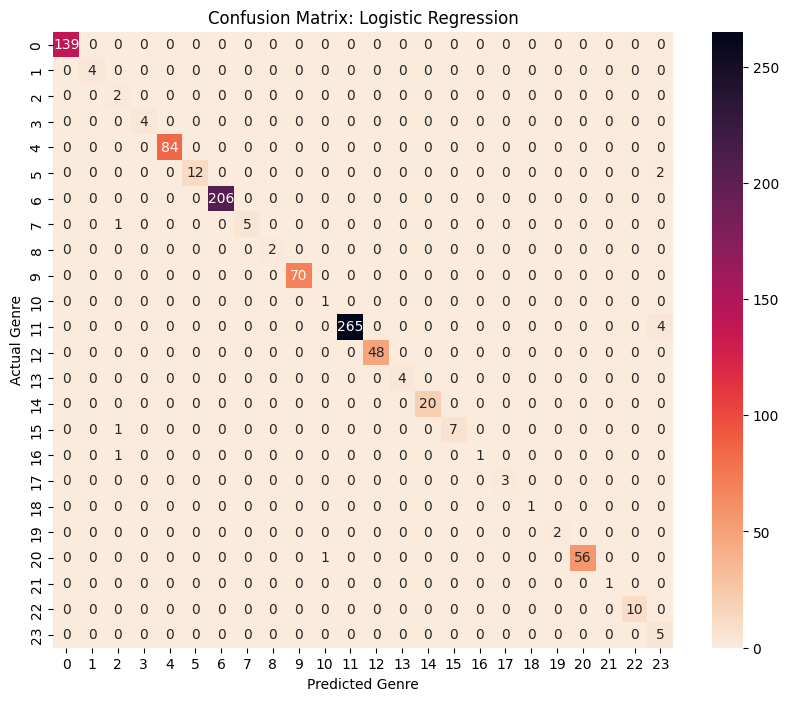

Training Random Forest...


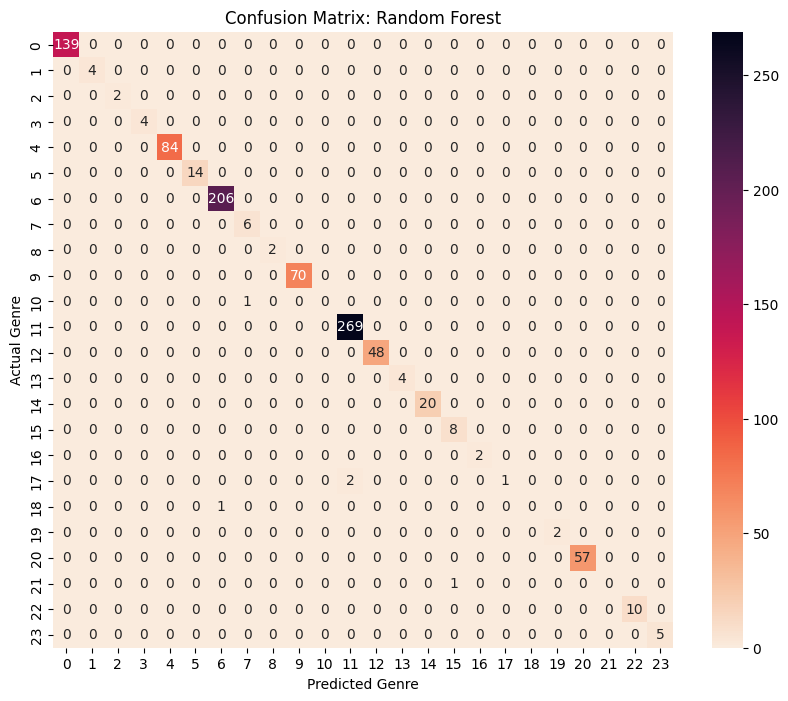

Training Decision Tree...


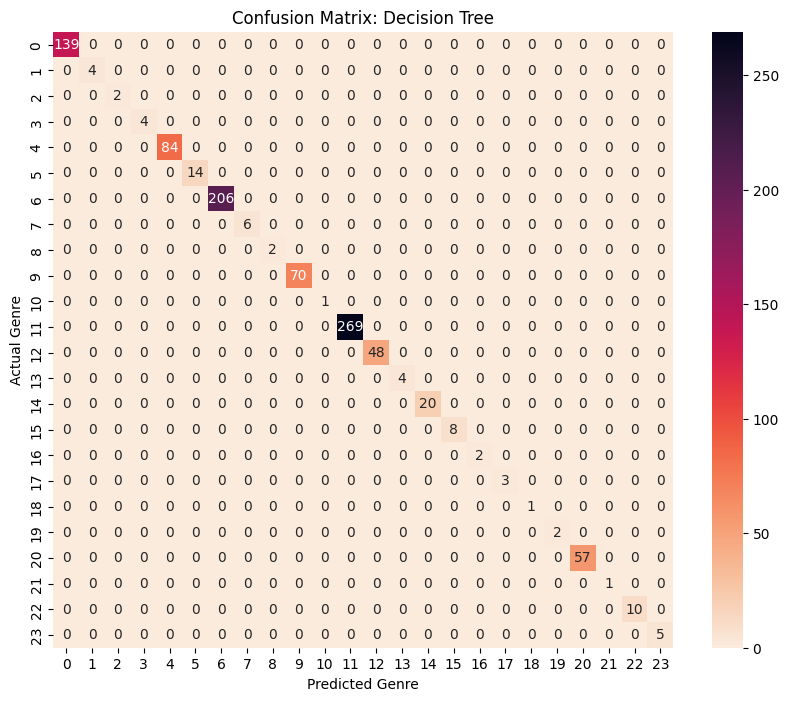

Training MLP...


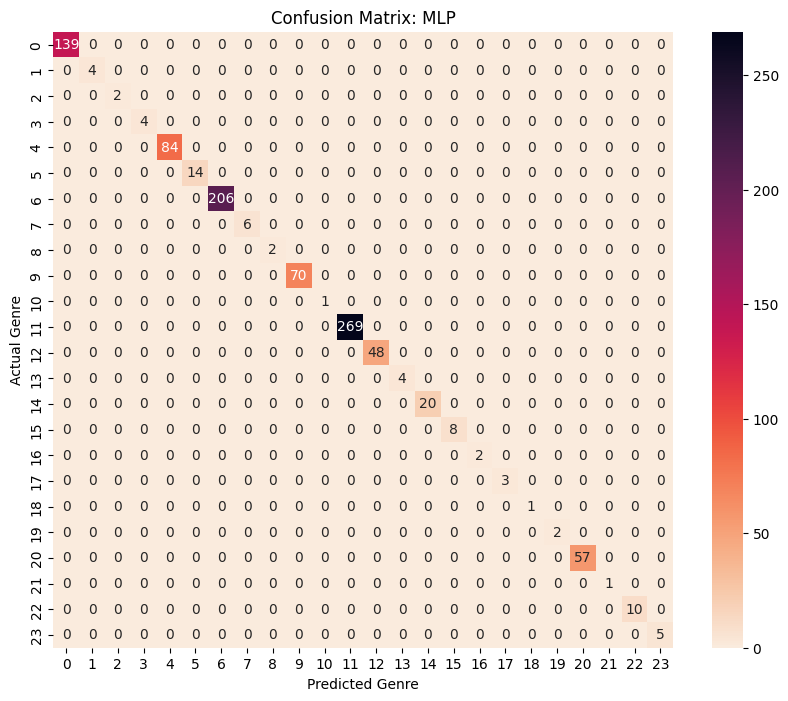

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

embeddings = np.vstack(df['vecemb_title'].values)
#separate embeddings, flatten array w shape: (4812, 768)
df_features = df.drop(columns=['vecemb_title', 'title'])
# drop embedding & title column from the og df

X = np.hstack([embeddings, df_features.values])
# combine flat embeddings with other features

# labeling ng genres
genre_cols = [col for col in df_features.columns if col.startswith('genre_')]
y = df_features[genre_cols].values.argmax(axis=1)
# convert one-hot to index

# count genre occurrences(?!)
genre_counts = pd.Series(y).value_counts()
valid_genres = genre_counts[genre_counts >= 1.5].index
# keep only ung mga >5 occurences para di sparse ung data

# filter to keeo only valid_genre
valid_mask = pd.Series(y).isin(valid_genres)
X_valid = X[valid_mask]
y_valid = y[valid_mask]

# splitting test-train data
X_train, X_test, y_train, y_test = train_test_split(
    X_valid, y_valid, stratify=y_valid, train_size=0.8, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=999, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "MLP": MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)
}

# Generate confusion matrices
for name, clf in classifiers.items():
    print(f"Training {name}...")

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Genre")
    plt.ylabel("Actual Genre")
    plt.show()



In [ ]:
for name, clf in classifiers.items():
    print(f"\n{name}:")
    cm = confusion_matrix(y_test, clf.predict(X_test))
    diagonal_sum = np.diag(cm).sum()
    total_sum = cm.sum()
    accuracy = diagonal_sum / total_sum
    print(f"  Diagonal Results Percentage: {accuracy:.2%}")


Logistic Regression:
  Diagonal Results Percentage: 98.96%

Random Forest:
  Diagonal Results Percentage: 99.48%

Decision Tree:
  Diagonal Results Percentage: 100.00%

MLP:
  Diagonal Results Percentage: 100.00%


In [ ]:
print(f"All genres: {len(genre_cols)}")
print(f"Genres after filtering: {len(valid_genres)}")

All genres: 31
Genres after filtering: 26


<Axes: >

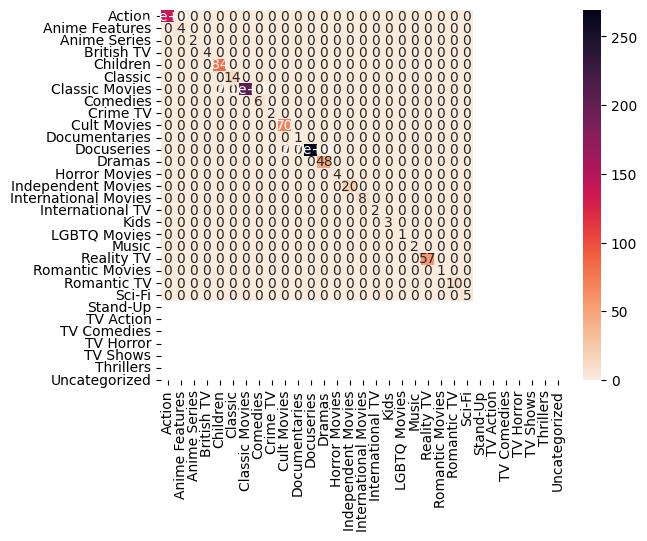

In [ ]:
genre_labels = [col.replace("genre_", "") for col in genre_cols]
sns.heatmap(cm, annot=True, cmap='rocket_r', xticklabels=genre_labels, yticklabels=genre_labels)

Training Logistic Regression (Embeddings Only)...


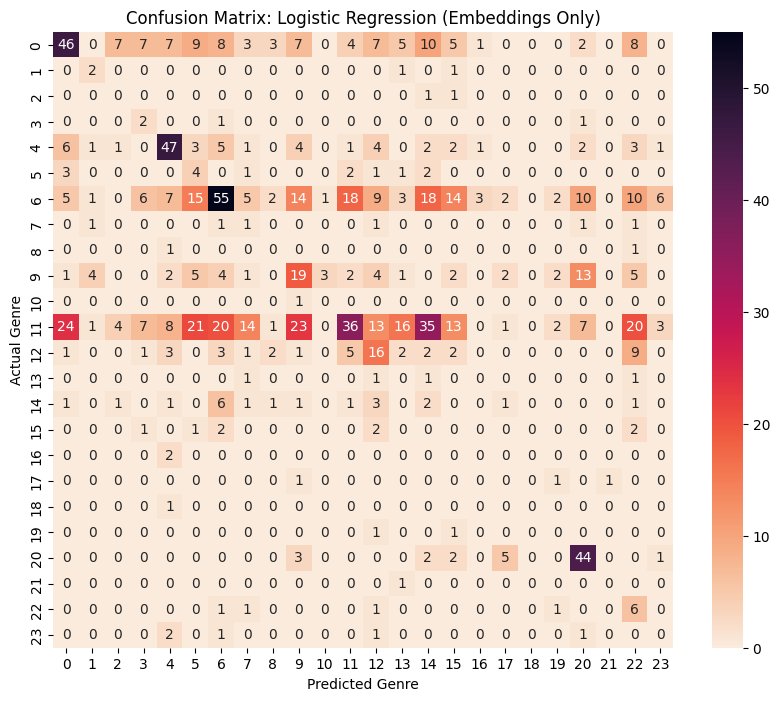

Training Random Forest (Embeddings Only)...


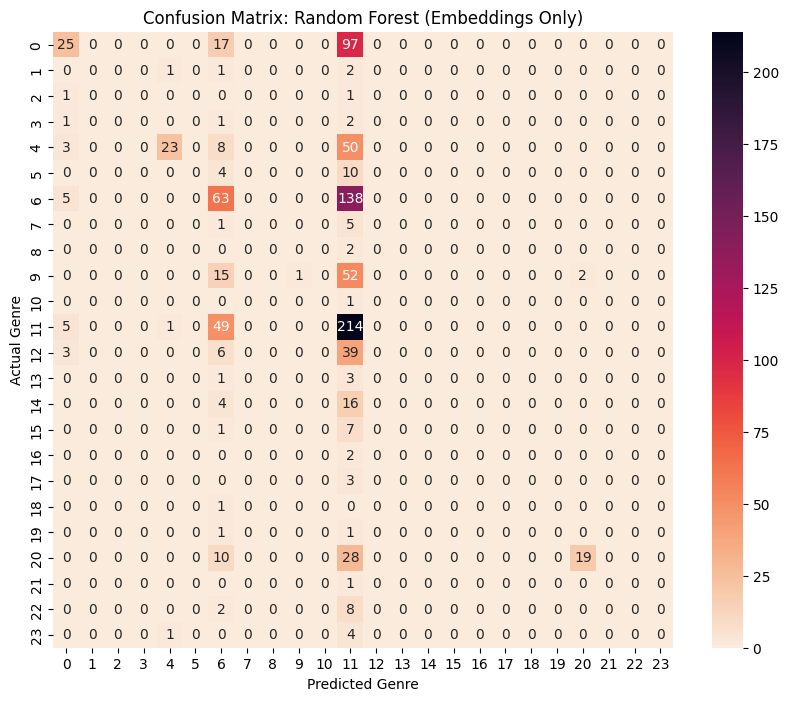

Training Decision Tree (Embeddings Only)...


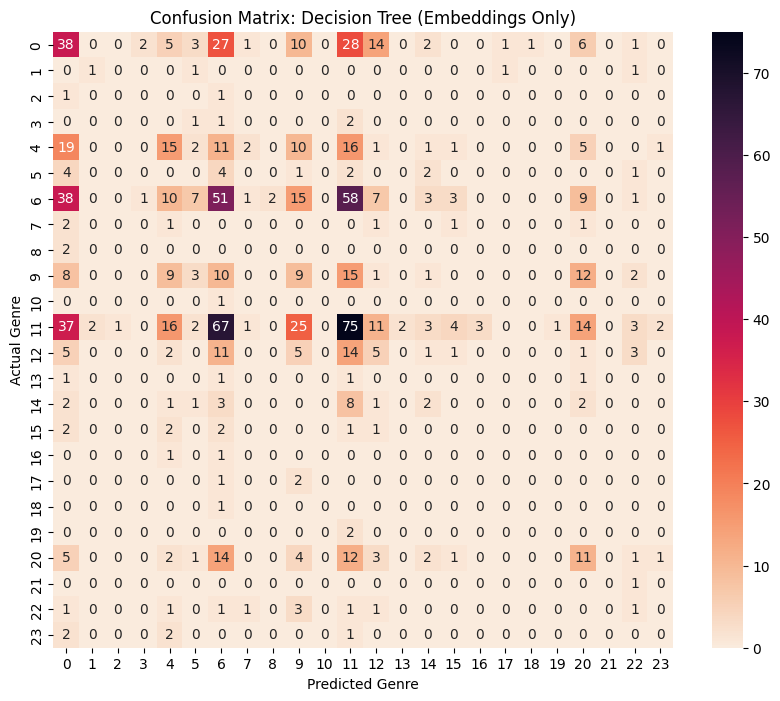

Training MLP (Embeddings Only)...


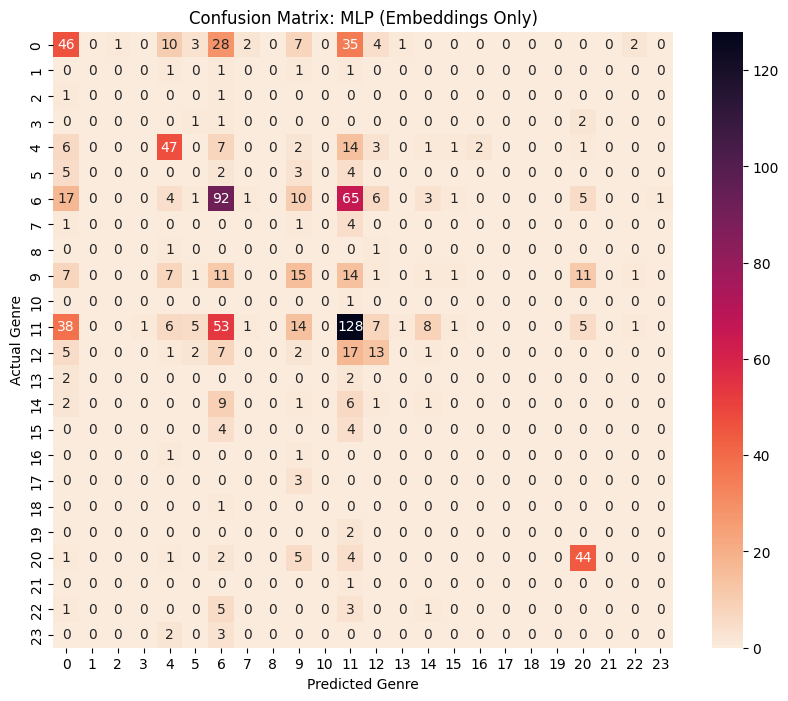


Logistic Regression (Embeddings Only):
  Diagonal Results Percentage: 29.11%

Random Forest (Embeddings Only):
  Diagonal Results Percentage: 35.86%

Decision Tree (Embeddings Only):
  Diagonal Results Percentage: 21.62%

MLP (Embeddings Only):
  Diagonal Results Percentage: 40.12%


In [ ]:
# Define classifiers to train only on embeddings
classifiers_embeddings_only = {
    "Logistic Regression (Embeddings Only)": LogisticRegression(max_iter=999, class_weight='balanced'),
    "Random Forest (Embeddings Only)": RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced'),
    "Decision Tree (Embeddings Only)": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "MLP (Embeddings Only)": MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)
}

# Prepare data for embeddings only training
X_embeddings_only = embeddings[valid_mask] # Use embeddings only, filtered by valid genres
y_embeddings_only = y[valid_mask]

# Split data for embeddings only
X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(
    X_embeddings_only, y_embeddings_only, stratify=y_embeddings_only, train_size=0.8, random_state=42)


# Train and evaluate classifiers on embeddings only
for name, clf in classifiers_embeddings_only.items():
    print(f"Training {name}...")

    clf.fit(X_train_emb, y_train_emb)

    y_pred_emb = clf.predict(X_test_emb)

    cm_emb = confusion_matrix(y_test_emb, y_pred_emb)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_emb, annot=True, fmt='d', cmap='rocket_r')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Genre")
    plt.ylabel("Actual Genre")
    plt.show()

# Print diagonal accuracy for embeddings only models
for name, clf in classifiers_embeddings_only.items():
    print(f"\n{name}:")
    cm_emb = confusion_matrix(y_test_emb, clf.predict(X_test_emb))
    diagonal_sum_emb = np.diag(cm_emb).sum()
    total_sum_emb = cm_emb.sum()
    accuracy_emb = diagonal_sum_emb / total_sum_emb
    print(f"  Diagonal Results Percentage: {accuracy_emb:.2%}")

Training Logistic Regression (Non-Embeddings Only)...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


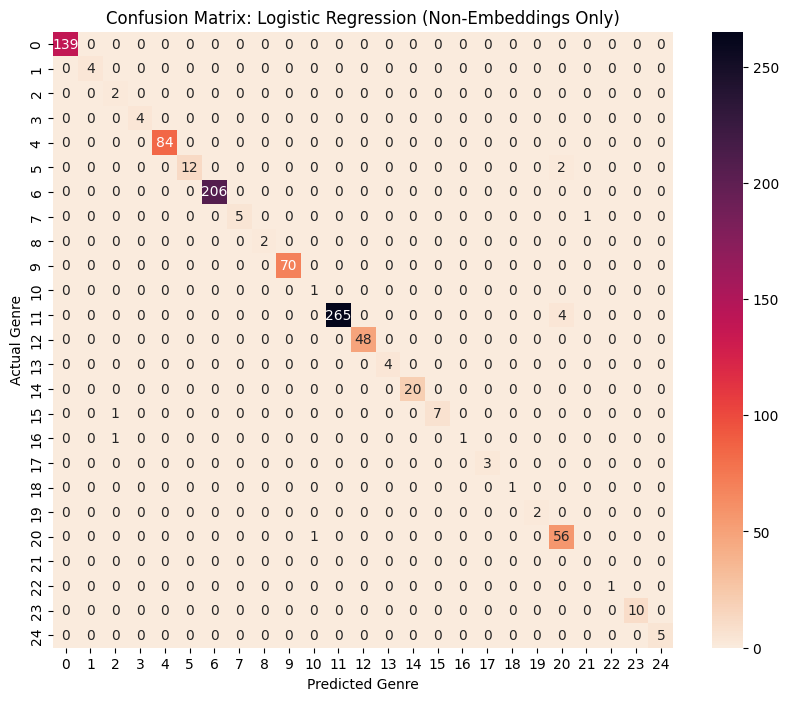

Training Random Forest (Non-Embeddings Only)...


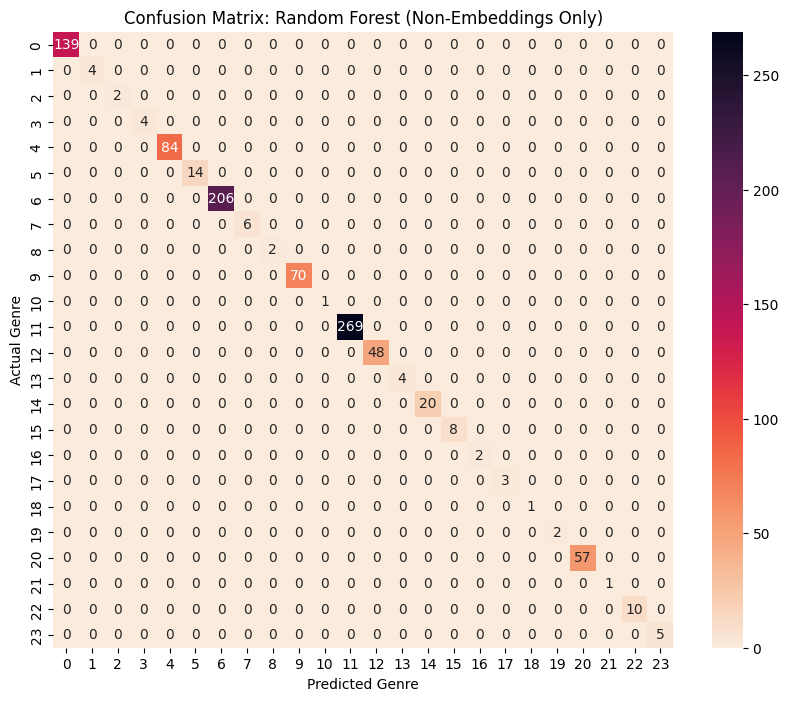

Training Decision Tree (Non-Embeddings Only)...


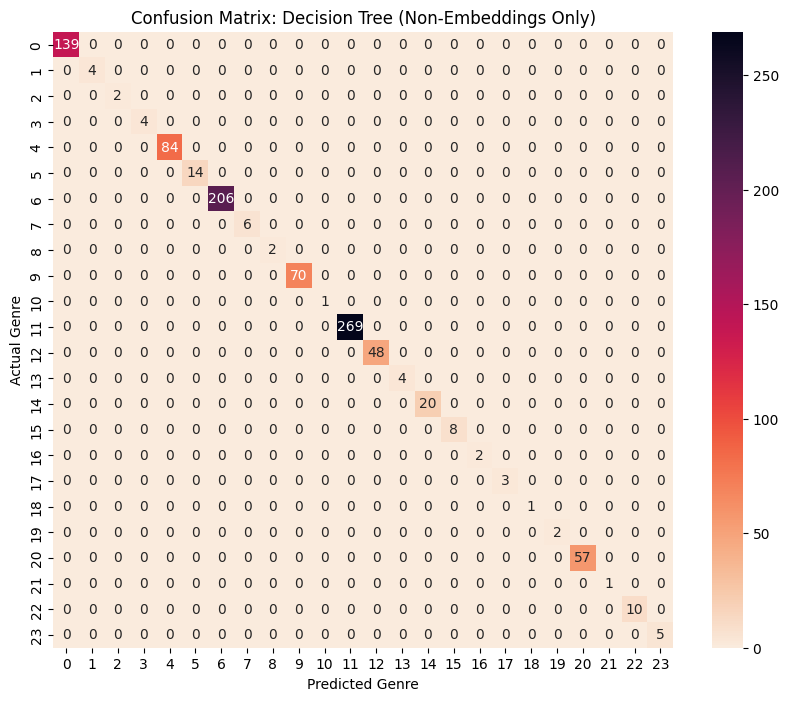

Training MLP (Non-Embeddings Only)...


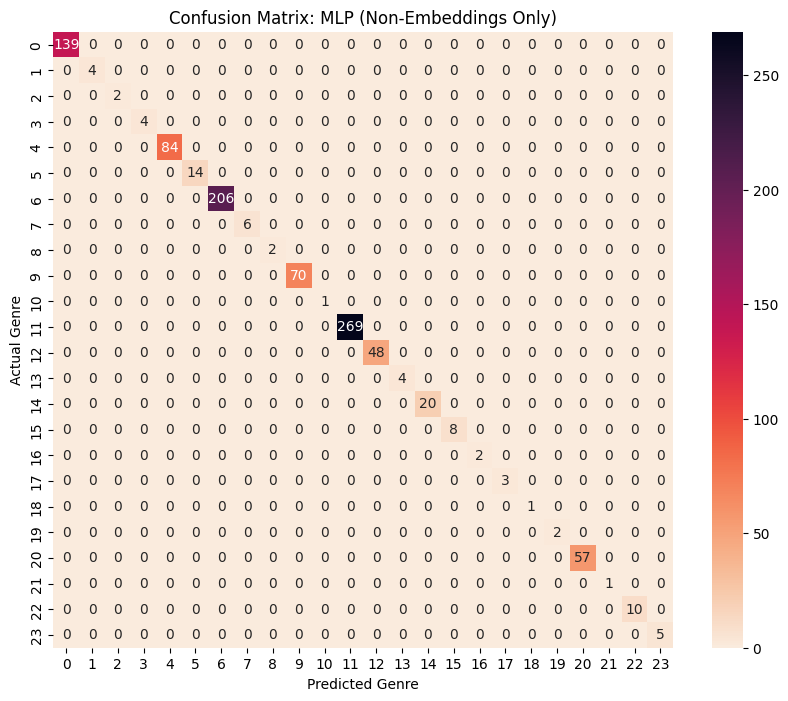


Logistic Regression (Non-Embeddings Only):
  Diagonal Results Percentage: 98.96%

Random Forest (Non-Embeddings Only):
  Diagonal Results Percentage: 100.00%

Decision Tree (Non-Embeddings Only):
  Diagonal Results Percentage: 100.00%

MLP (Non-Embeddings Only):
  Diagonal Results Percentage: 100.00%


In [ ]:
# Train classifiers only on non-embedding features
classifiers_non_embeddings_only = {
    "Logistic Regression (Non-Embeddings Only)": LogisticRegression(max_iter=999, class_weight='balanced'),
    "Random Forest (Non-Embeddings Only)": RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced'),
    "Decision Tree (Non-Embeddings Only)": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "MLP (Non-Embeddings Only)": MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)
}

# Prepare data for non-embeddings only training
# X_train_non_emb and X_test_non_emb will contain the non-embedding features from the original split
X_train_non_emb = X_train[:, embeddings.shape[1]:]
X_test_non_emb = X_test[:, embeddings.shape[1]:]
y_train_non_emb = y_train # Target is the same
y_test_non_emb = y_test # Target is the same


# Train and evaluate classifiers on non-embedding features only
for name, clf in classifiers_non_embeddings_only.items():
    print(f"Training {name}...")

    clf.fit(X_train_non_emb, y_train_non_emb)

    y_pred_non_emb = clf.predict(X_test_non_emb)

    cm_non_emb = confusion_matrix(y_test_non_emb, y_pred_non_emb)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_non_emb, annot=True, fmt='d', cmap='rocket_r')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Genre")
    plt.ylabel("Actual Genre")
    plt.show()

# Print diagonal accuracy for non-embeddings only models
for name, clf in classifiers_non_embeddings_only.items():
    print(f"\n{name}:")
    cm_non_emb = confusion_matrix(y_test_non_emb, clf.predict(X_test_non_emb))
    diagonal_sum_non_emb = np.diag(cm_non_emb).sum()
    total_sum_non_emb = cm_non_emb.sum()
    accuracy_non_emb = diagonal_sum_non_emb / total_sum_non_emb
    print(f"  Diagonal Results Percentage: {accuracy_non_emb:.2%}")

Training Logistic Regression (Non-Embeddings, No Genre)...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


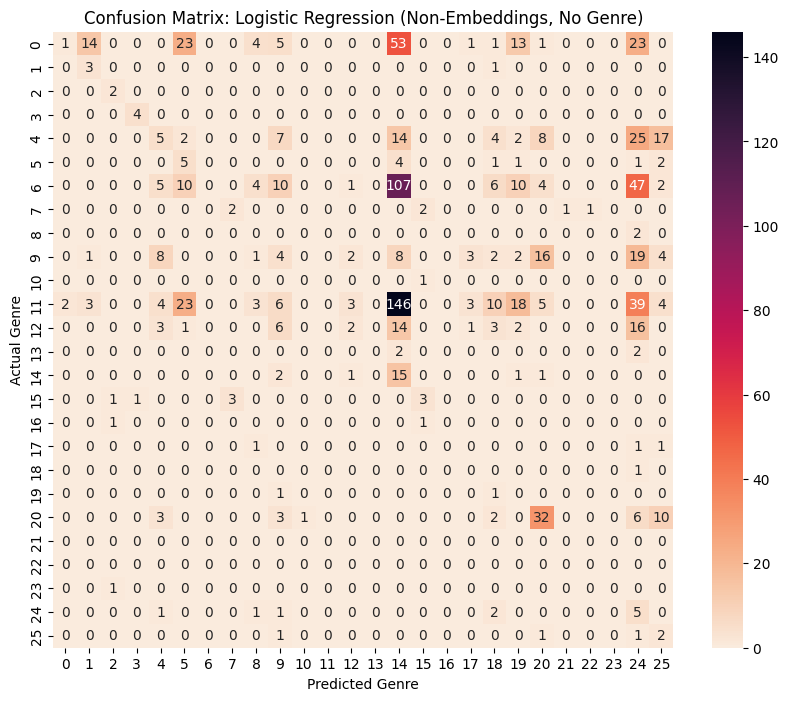

Training Random Forest (Non-Embeddings, No Genre)...


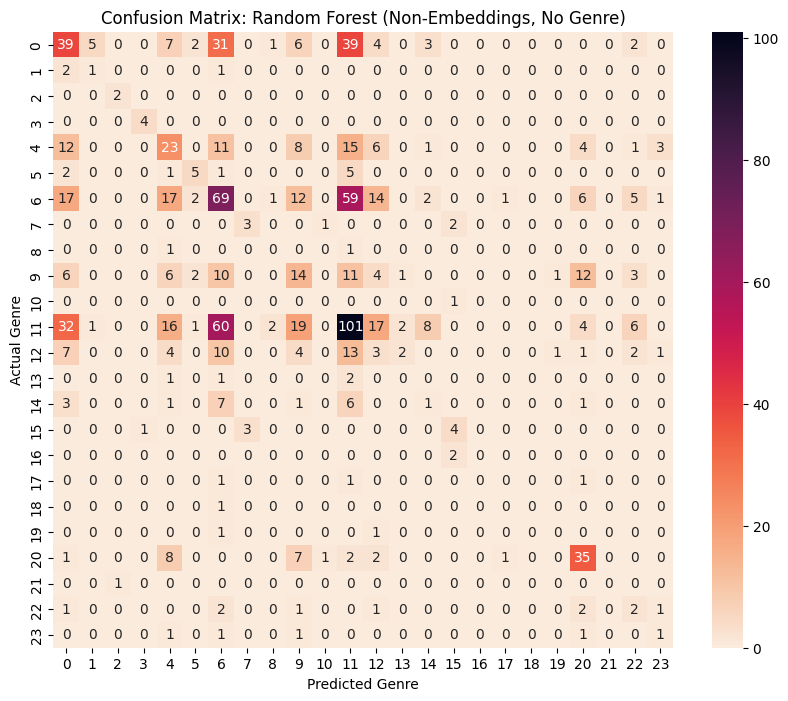

Training Decision Tree (Non-Embeddings, No Genre)...


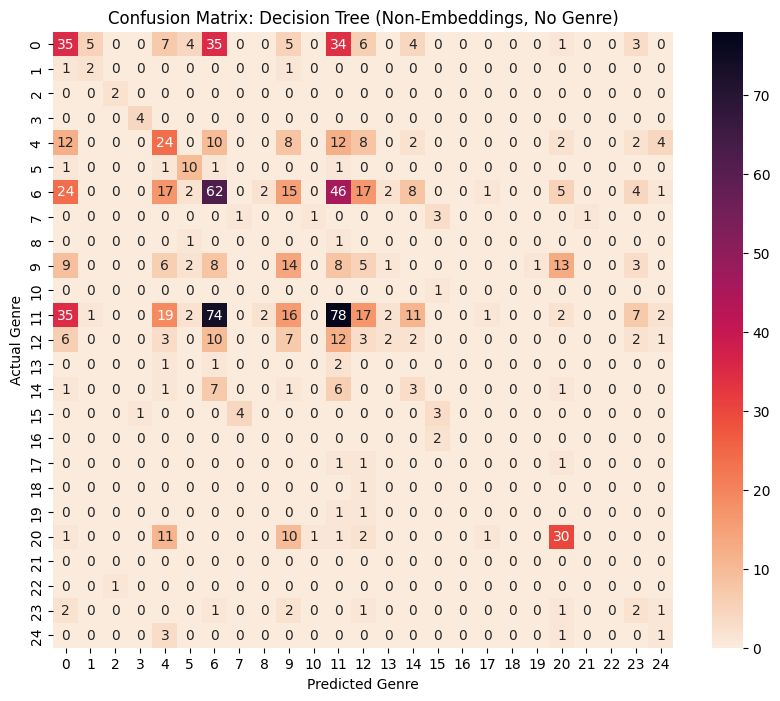

Training MLP (Non-Embeddings, No Genre)...


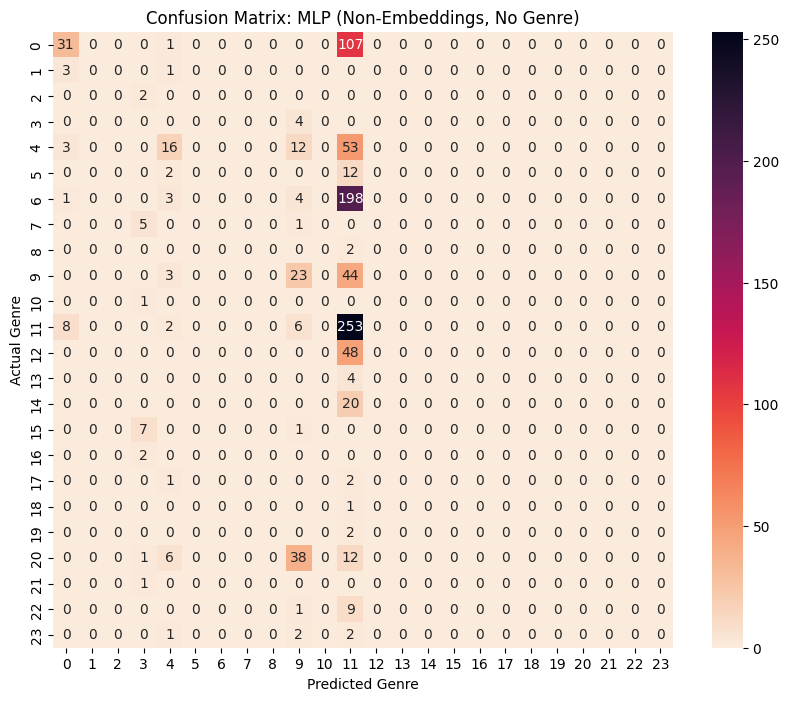


Logistic Regression (Non-Embeddings, No Genre):
  Diagonal Results Percentage: 8.84%

Random Forest (Non-Embeddings, No Genre):
  Diagonal Results Percentage: 31.91%

Decision Tree (Non-Embeddings, No Genre):
  Diagonal Results Percentage: 28.48%

MLP (Non-Embeddings, No Genre):
  Diagonal Results Percentage: 33.58%


In [ ]:
# prompt: # Train classifiers only on non-embedding features and remove the genre columns

import matplotlib.pyplot as plt
import numpy as np
# Remove genre columns from the non-embedding features
# genre_cols is already defined containing columns that start with 'genre_'
# We need to find the indices of these columns in the original df_features
non_embedding_feature_cols = [col for col in df_features.columns if col not in genre_cols and col != 'title'] # Exclude title as well

# Get the indices of these columns within the non-embedding features
# The columns in X_train_non_emb and X_test_non_emb are in the same order as
# the non-embedding columns in df_features, starting from the first non-embedding column.
# We need to find the relative index of non_embedding_feature_cols within the columns used to form X_train_non_emb.

# The columns used to form X_train_non_emb are df_features.columns that are not genre_cols and not 'title' or 'vecemb_title' before the split.
# Let's get the list of all non-embedding columns used to create X_train_non_emb
all_non_embedding_cols_in_df_features = [col for col in df_features.columns if col not in genre_cols and col != 'title']

# Now, find the indices of non_embedding_feature_cols within this list.
# This gives us the correct indices to slice X_train_non_emb and X_test_non_emb
indices_to_keep = [all_non_embedding_cols_in_df_features.index(col) for col in non_embedding_feature_cols]


# Extract the non-embedding features only, excluding genre columns
X_train_non_emb_no_genre = X_train_non_emb[:, indices_to_keep]
X_test_non_emb_no_genre = X_test_non_emb[:, indices_to_keep]

# Define classifiers to train only on non-embedding features (excluding genre columns)
classifiers_non_embeddings_no_genre = {
    "Logistic Regression (Non-Embeddings, No Genre)": LogisticRegression(max_iter=999, class_weight='balanced'),
    "Random Forest (Non-Embeddings, No Genre)": RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced'),
    "Decision Tree (Non-Embeddings, No Genre)": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "MLP (Non-Embeddings, No Genre)": MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)
}

# Train and evaluate classifiers on non-embedding features only (excluding genre columns)
for name, clf in classifiers_non_embeddings_no_genre.items():
    print(f"Training {name}...")

    clf.fit(X_train_non_emb_no_genre, y_train_non_emb) # y_train_non_emb is the genre target

    y_pred_non_emb_no_genre = clf.predict(X_test_non_emb_no_genre)

    cm_non_emb_no_genre = confusion_matrix(y_test_non_emb, y_pred_non_emb_no_genre) # y_test_non_emb is the genre target
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_non_emb_no_genre, annot=True, fmt='d', cmap='rocket_r')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Genre")
    plt.ylabel("Actual Genre")
    plt.show()

# Print diagonal accuracy for non-embeddings only models (excluding genre columns)
for name, clf in classifiers_non_embeddings_no_genre.items():
    print(f"\n{name}:")
    cm_non_emb_no_genre = confusion_matrix(y_test_non_emb, clf.predict(X_test_non_emb_no_genre))
    diagonal_sum_non_emb_no_genre = np.diag(cm_non_emb_no_genre).sum()
    total_sum_non_emb_no_genre = cm_non_emb_no_genre.sum()
    accuracy_non_emb_no_genre = diagonal_sum_non_emb_no_genre / total_sum_non_emb_no_genre
    print(f"  Diagonal Results Percentage: {accuracy_non_emb_no_genre:.2%}")


--- Training on Combined Features (Embeddings + Non-Embeddings excluding Genre) ---
Training Logistic Regression (Combined)...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


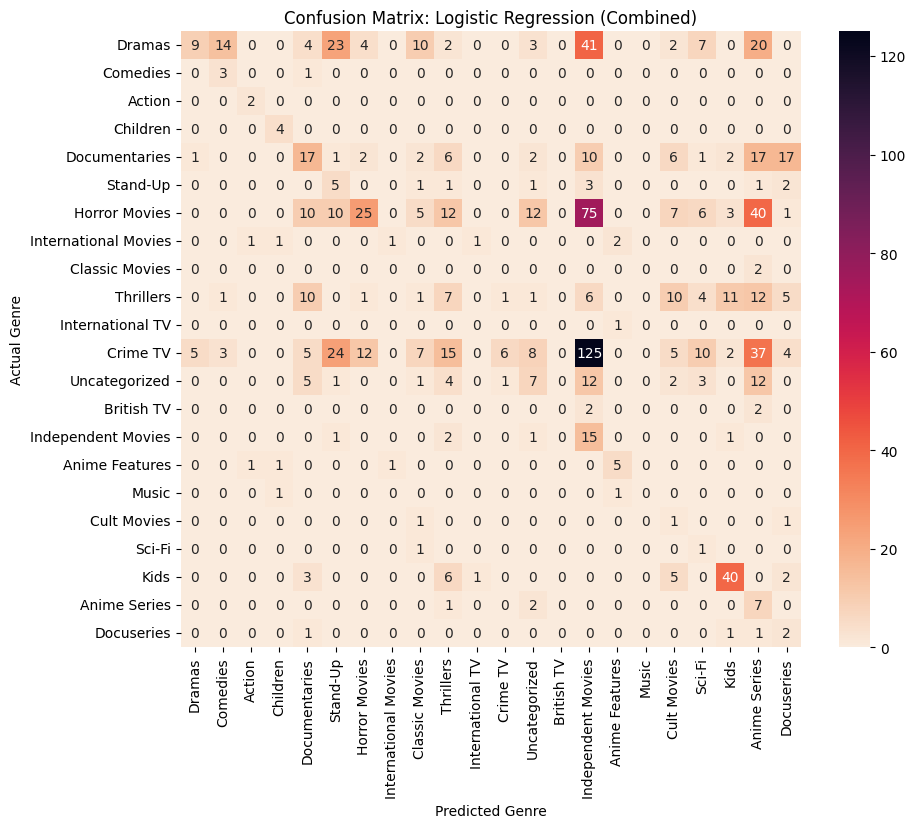

  Diagonal Results Percentage: 16.37%
Training Random Forest (Combined)...


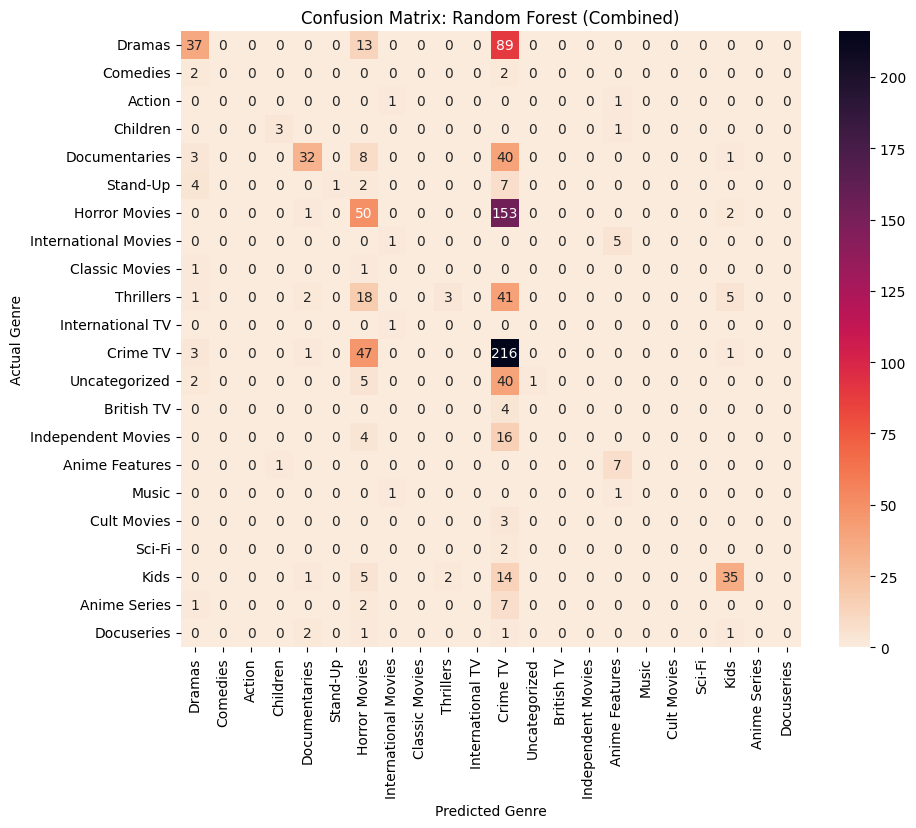

  Diagonal Results Percentage: 40.25%
Training Decision Tree (Combined)...


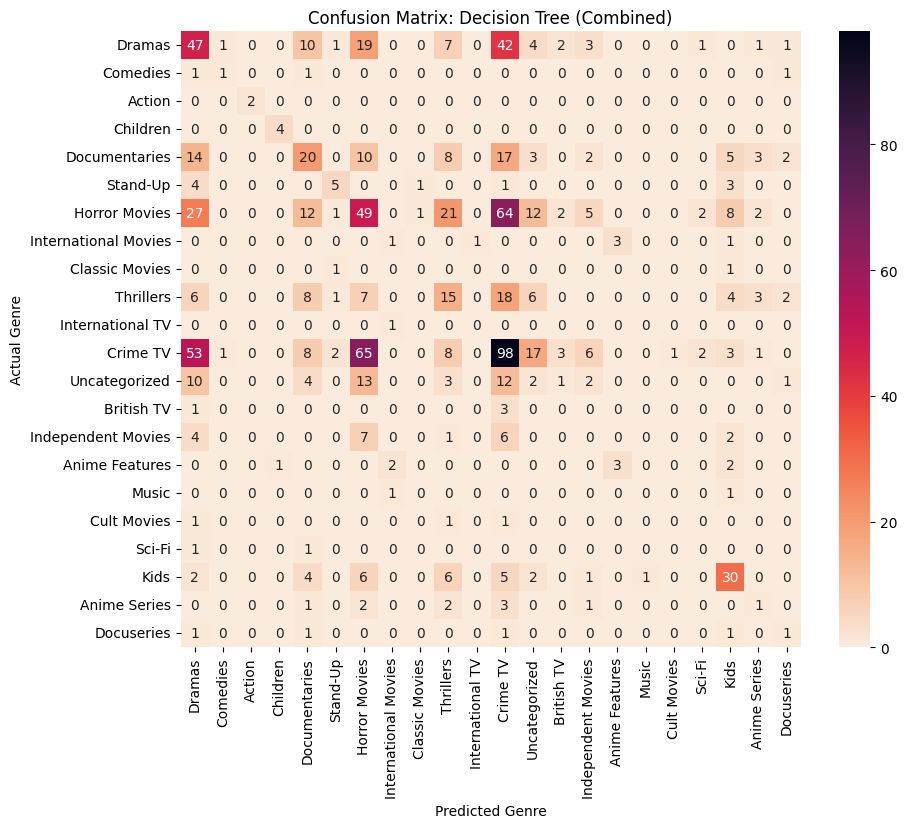

  Diagonal Results Percentage: 29.09%
Training MLP (Combined)...


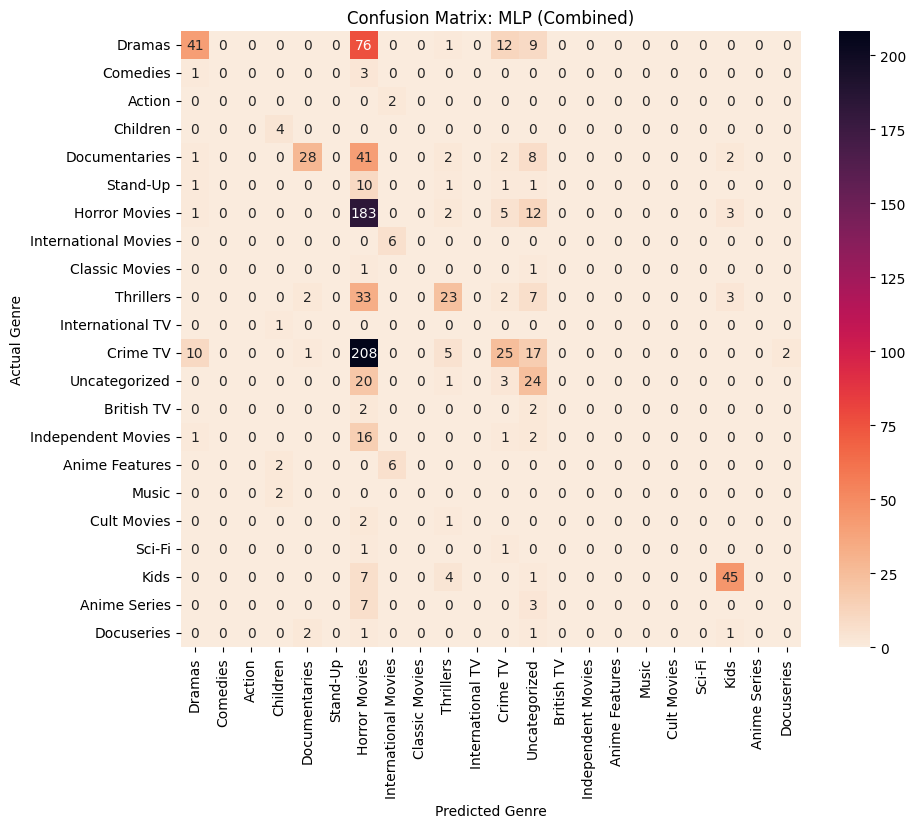

  Diagonal Results Percentage: 39.52%


In [ ]:
# prompt: redo the training, explicitly remove the genre and make sure that the embeddings and non-embeddings are included in the training

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Re-define the target variable 'y' to be the genre labels
genre_cols = [col for col in df.columns if col.startswith('genre_')]
# Check if genre_cols are in df.columns before selecting
if not all(col in df.columns for col in genre_cols):
    print("Error: Genre columns not found in DataFrame. Please ensure one-hot encoding of 'genre' was successful.")
else:
    y = df[genre_cols].values.argmax(axis=1) # convert one-hot to index

    # count genre occurrences
    genre_counts = pd.Series(y).value_counts()
    # keep only genres with at least 5 occurrences
    valid_genres = genre_counts[genre_counts >= 5].index

    # filter to keep only valid_genre
    valid_mask = pd.Series(y).isin(valid_genres)

    # Prepare the feature set X including both embeddings and other non-genre features
    # Make sure 'genre' and 'vecemb_title', 'title' are dropped from the feature DataFrame
    df_features_no_genre = df.drop(columns=genre_cols + ['vecemb_title', 'title'], errors='ignore') # Use errors='ignore' in case columns were already dropped

    # Ensure embeddings are correctly extracted and stacked
    if 'vecemb_title' in df.columns:
        embeddings = np.vstack(df['vecemb_title'].values)
    else:
        print("Error: 'vecemb_title' column not found. Embeddings were not created.")
        embeddings = np.array([]) # Initialize empty array if embeddings are missing

    if embeddings.size > 0:
        # Combine embeddings with other features (filtered by the valid mask)
        X_combined = np.hstack([embeddings, df_features_no_genre.values])[valid_mask]
        y_combined = y[valid_mask]

        # Splitting test-train data for combined features
        X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
            X_combined, y_combined, stratify=y_combined, train_size=0.8, random_state=42)

        # Define classifiers for combined features
        classifiers_combined = {
            "Logistic Regression (Combined)": LogisticRegression(max_iter=999, class_weight='balanced'),
            "Random Forest (Combined)": RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced'),
            "Decision Tree (Combined)": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
            "MLP (Combined)": MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)
        }

        # Train and evaluate classifiers on combined features
        print("\n--- Training on Combined Features (Embeddings + Non-Embeddings excluding Genre) ---")
        for name, clf in classifiers_combined.items():
            print(f"Training {name}...")

            clf.fit(X_train_combined, y_train_combined)

            y_pred_combined = clf.predict(X_test_combined)

            cm_combined = confusion_matrix(y_test_combined, y_pred_combined)
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm_combined, annot=True, fmt='d', cmap='rocket_r',
                        xticklabels=[genre_labels[i] for i in valid_genres],
                        yticklabels=[genre_labels[i] for i in valid_genres])
            plt.title(f"Confusion Matrix: {name}")
            plt.xlabel("Predicted Genre")
            plt.ylabel("Actual Genre")
            plt.show()

            # Print diagonal accuracy for combined models
            diagonal_sum_combined = np.diag(cm_combined).sum()
            total_sum_combined = cm_combined.sum()
            accuracy_combined = diagonal_sum_combined / total_sum_combined
            print(f"  Diagonal Results Percentage: {accuracy_combined:.2%}")

    else:
        print("Skipping combined features training because embeddings were not generated.")
